In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
loss = {
    "with_eiffl_FedLbs_c30": [0.00457, 0.00086, 0.00141],
    "with_eiffl_FedAvg_c30": [0.00463, 0.00167, None], 
    "with_eiffl_FedLbs_c40": [0.0049, 0.0013, 0.0018],
    "with_eiffl_FedAvg_c40": [0.00496, 0.0024, None],
    "without_eiffl_FedLbs_c30": [0.00477, 0.00127, None],
    "without_eiffl_FedAvg_c30": [0.00484, 0.00165, None],
    "without_eiffl_FedLbs_c40": [0.00509, 0.00239, None],
    "without_eiffl_FedAvg_c40": [0.0054, 0.00244, None],
}

smape = {
    "with_eiffl_FedLbs_c30": [28.73, 28.79, 25.2],
    "with_eiffl_FedAvg_c30": [29.04, 31.28, None],
    "with_eiffl_FedLbs_c40": [29.35, 35.26, None],
    "with_eiffl_FedAvg_c40": [29.89, 40.13, None],
    "without_eiffl_FedLbs_c30": [38.05, 33.34, None],
    "without_eiffl_FedAvg_c30": [38.47, 41.5, None],
    "without_eiffl_FedLbs_c40": [37.87, 31.24, None],
    "without_eiffl_FedAvg_c40": [38.22, 35.04, None],
}

mae = {
    "with_eiffl_FedLbs_c30": [7.41, 13.29, 12.42],
    "with_eiffl_FedAvg_c30": [7.49, 14.79, None],
    "with_eiffl_FedLbs_c40": [7.69, 17.09, 15.25],
    "with_eiffl_FedAvg_c40": [7.86, 18.86, None],
    "without_eiffl_FedLbs_c30": [33.48, 15.16, None],
    "without_eiffl_FedAvg_c30": [41.17, 18.18, None],
    "without_eiffl_FedLbs_c40": [37.87, 17.21, None],
    "without_eiffl_FedAvg_c40": [38.22, 23.55, None],
}

time = {
    "with_eiffl_FedLbs_c30":[3 * 3600 + 17 * 60 + 36, 8 * 3600 + 52 * 60 + 22],
    "with_eiffl_FedAvg_c30":  [3 * 3600 + 57 * 60 + 17, 8 * 3600 + 21 * 60 + 27],
    "with_eiffl_FedLbs_c40": [3 * 3600 + 34, 12 * 3600 + 56 * 60 + 20],
    "with_eiffl_FedAvg_c40": [3 * 3600 + 24 * 60 + 13, 12 * 3600 + 2 * 60 + 24],
    "without_eiffl_FedLbs_c30": [3 * 3600 + 17 * 60 + 41, 7 * 3600 + 12 * 60 + 41],
    "without_eiffl_FedAvg_c30": [3 * 3600 + 43 * 60 + 42, 8 * 3600 + 2 * 60 + 50],
    "without_eiffl_FedLbs_c40": [3 * 3600 + 17 * 60 + 36, 11 * 3600 + 45 * 60 + 33],
    "without_eiffl_FedAvg_c40": [4 * 3600 + 24 * 60 + 54, 11 * 3600 + 34 * 60 + 16],
}

In [4]:
# Combine all data arrays into a single dictionary
data_dict = {
    "loss": loss,
    "smape": smape,
    "mae": mae,
    "time": time,
}

data_list = []

# Convert dictionary into a DataFrame-friendly format
for metric, config_dict in data_dict.items():
    for config, values in config_dict.items():
        for value in values:
            data_list.append({"Metric": metric, "Configuration": config, "Value": value})

# Create a DataFrame
input_data = pd.DataFrame(data_list)

# Calculate Mean and Confidence Intervals
grouped_data = input_data.groupby(["Metric", "Configuration"])["Value"].agg(
    Mean="mean",
    CI_Lower=lambda x: np.percentile(x, 2.5),
    CI_Upper=lambda x: np.percentile(x, 97.5)
).reset_index()

# Merge the calculated data back to the input_data for plotting
input_data = pd.merge(input_data, grouped_data, on=["Metric", "Configuration"])


In [5]:
def plot_boxplots_with_subfigures(data, metric_name):
    # Define configurations based on the renamed data
    configurations = {
        "c=30": [
            "with_eiffl_FedLbs_c30", "with_eiffl_FedAvg_c30", 
            "without_eiffl_FedLbs_c30", "without_eiffl_FedAvg_c30"
        ],
        "c=40": [
            "with_eiffl_FedLbs_c40", "with_eiffl_FedAvg_c40", 
            "without_eiffl_FedLbs_c40", "without_eiffl_FedAvg_c40"
        ]
    }

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    # fig.suptitle(f"{metric_name.capitalize()} Dispersion Comparison With and Without Anomaly Detection", fontsize=18)

    for idx, (config, config_values) in enumerate(configurations.items()):
        # Filter data for the specific configuration group
        metric_data = data.loc[
            data["Configuration"].isin(config_values) & (data["Metric"] == metric_name)
        ].copy()  # Use .copy() to avoid SettingWithCopyWarning

        # Simplify x-tick labels (remove _c30 and _c40)
        metric_data.loc[:, "Configuration"] = metric_data["Configuration"].str.replace("_c30", "", regex=False).str.replace("_c40", "", regex=False)

        # Plot Box Plot
        sns.boxplot(
            x="Configuration", 
            y="Value", 
            data=metric_data, 
            ax=axes[idx], 
            palette="muted",
        )
        # Add `(a)` and `(b)` before the titles
        axes[idx].set_title(f"{config.upper()}", fontsize=22)
        axes[idx].set_xlabel("", fontsize=20)  # Removed redundant xlabel text
        axes[idx].tick_params(axis='x', rotation=30, labelsize=20)
        axes[idx].tick_params(axis='y', labelsize=18)

        if idx == 0:  # Set shared y-label only once
            if metric_name == "time":
                axes[idx].set_ylabel("Time (s)", fontsize=24)
            else:
                axes[idx].set_ylabel(metric_name.capitalize(), fontsize=24)
        else:
            axes[idx].set_ylabel("")  # No y-label for the second subplot

    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for suptitle
    plt.show()


In [22]:
def plot_boxplots_with_legend(data, metric_name):
    # Define configurations based on the renamed data
    configurations = {
        "c=30": [
            "with_eiffl_FedLbs_c30", "with_eiffl_FedAvg_c30", 
            "without_eiffl_FedLbs_c30", "without_eiffl_FedAvg_c30"
        ],
        "c=40": [
            "with_eiffl_FedLbs_c40", "with_eiffl_FedAvg_c40", 
            "without_eiffl_FedLbs_c40", "without_eiffl_FedAvg_c40"
        ]
    }

    # Define a color palette for consistent colors
    palette = {
        "with_eiffl_FedLbs": "blue",
        "with_eiffl_FedAvg": "orange",
        "without_eiffl_FedLbs": "green",
        "without_eiffl_FedAvg": "red"
    }

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

    for idx, (config, config_values) in enumerate(configurations.items()):
        # Filter data for the specific configuration group
        metric_data = data.loc[
            data["Configuration"].isin(config_values) & (data["Metric"] == metric_name)
        ].copy()

        # Simplify x-tick labels (remove _c30 and _c40)
        metric_data["Short Configuration"] = (
            metric_data["Configuration"]
            .str.replace("_c30", "", regex=False)
            .str.replace("_c40", "", regex=False)
        )

        # Map colors using the palette
        color_list = metric_data["Short Configuration"].map(palette)

        # Plot Box Plot
        sns.boxplot(
            x="Short Configuration", 
            y="Value", 
            data=metric_data, 
            ax=axes[idx], 
            palette=palette
        )

        # Remove x-tick labels
        axes[idx].set_xticklabels([])

        # Set subplot title and y-label
        axes[idx].set_title(f"{config.upper()}", fontsize=22)
        axes[idx].tick_params(axis='y', labelsize=18)

        # Add x-label "Scenario" with bigger font size
        axes[idx].set_xlabel("Scenario", fontsize=24)

        if idx == 0:  # Set shared y-label only once
            if metric_name == "time":
                axes[idx].set_ylabel("Time (s)", fontsize=24)
            else:
                axes[idx].set_ylabel(metric_name.capitalize(), fontsize=24)
        else:
            axes[idx].set_ylabel("")  # No y-label for the second subplot

    # Collect legend handles and labels (only once)
    handles = [
        plt.Line2D([], [], color=color, label=label) 
        for label, color in palette.items()
    ]

    # Add a single horizontal legend below the figure
    fig.legend(
        handles=handles, 
        loc='lower center', 
        bbox_to_anchor=(0.5, -0.05), 
        ncol=len(handles), 
        fontsize=22, 
        frameon=False
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the legend
    plt.subplots_adjust(bottom=0.15)  # Add extra space at the bottom
    plt.show()


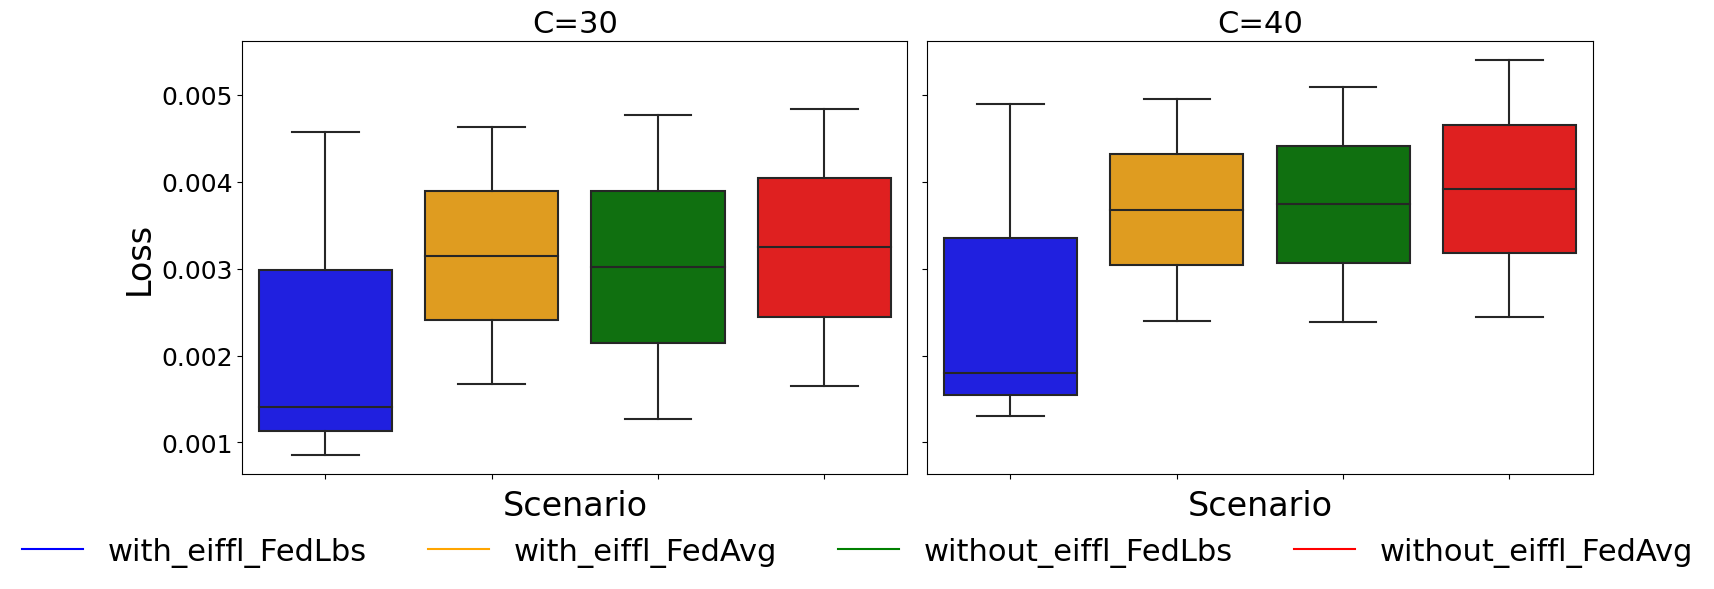

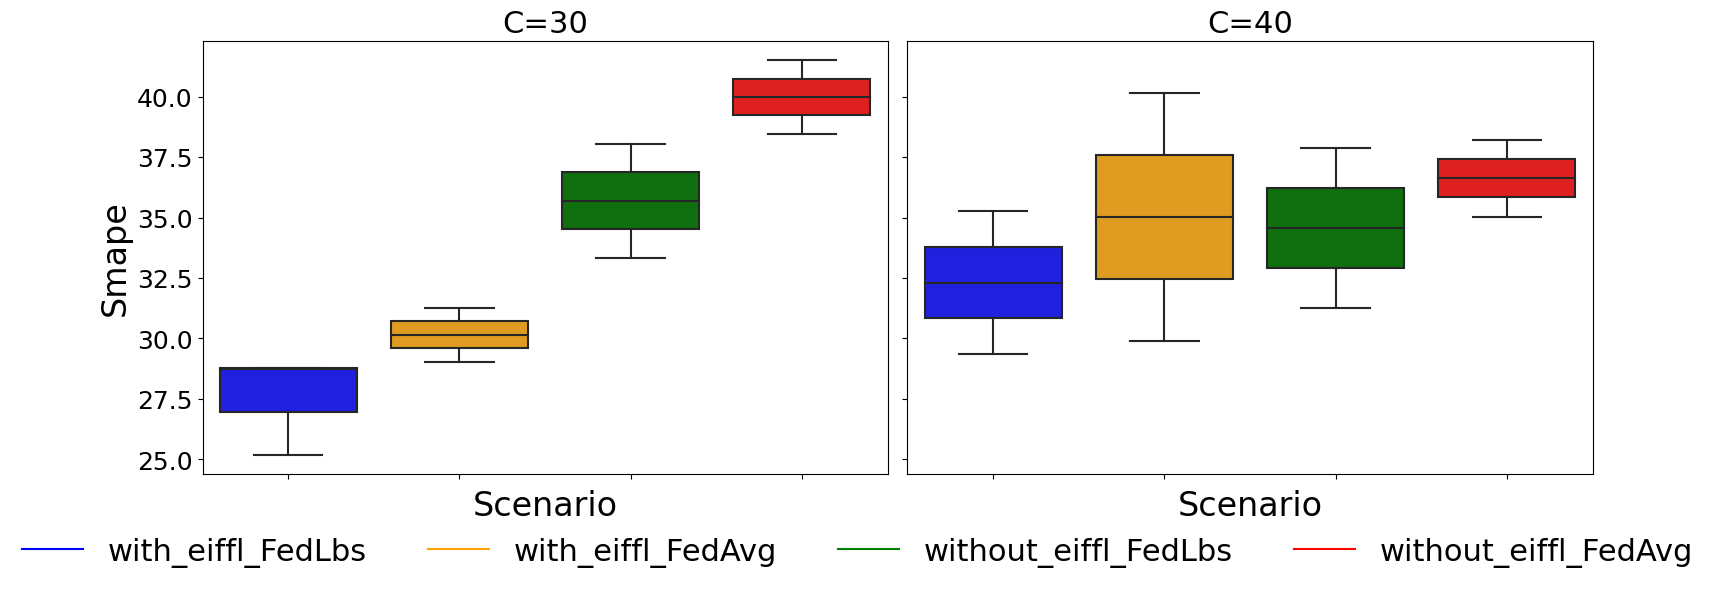

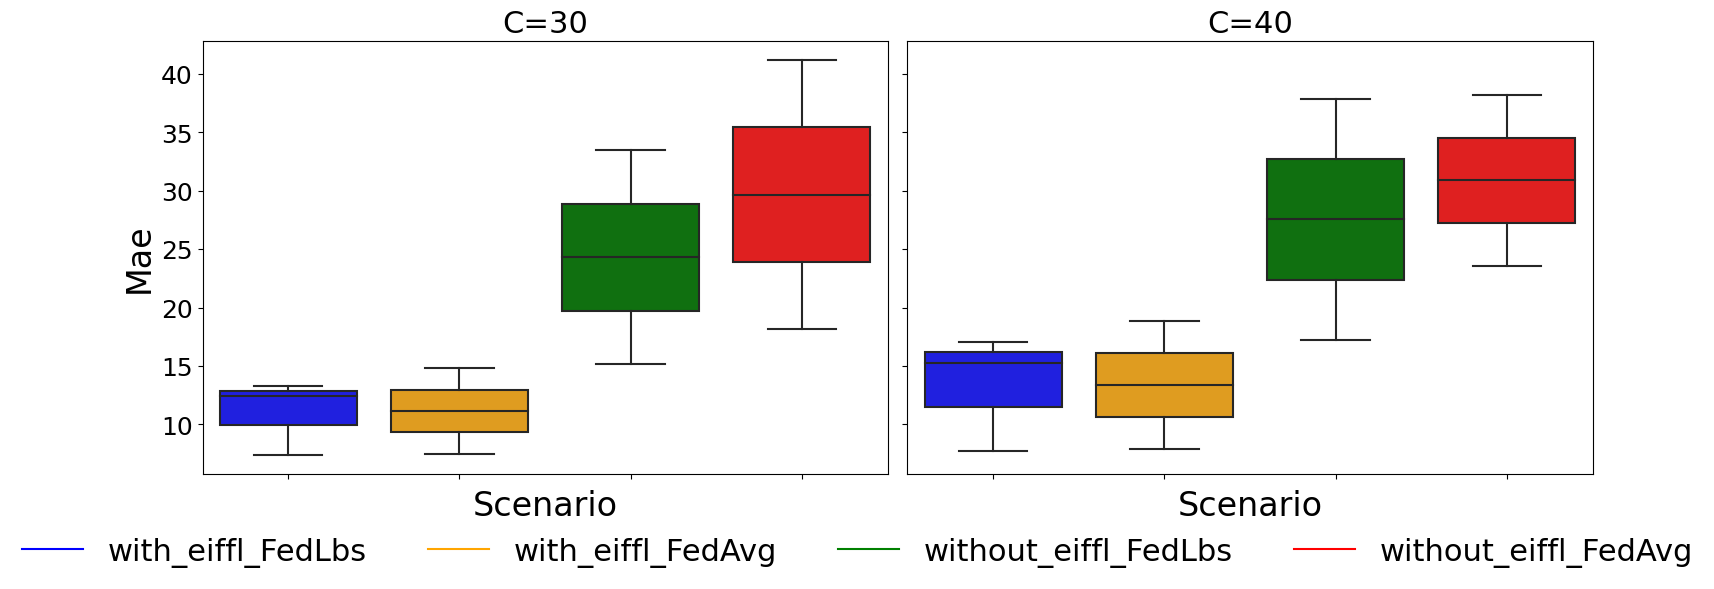

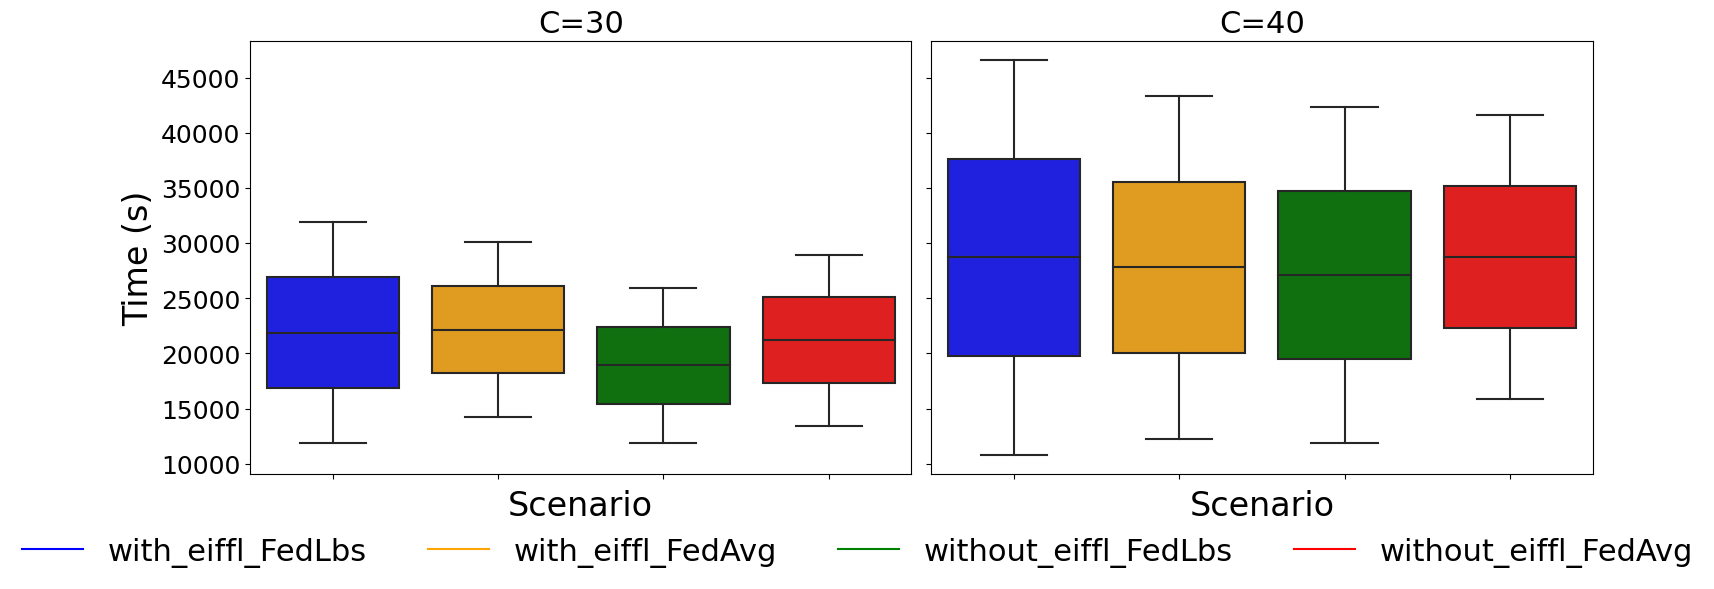

In [23]:
for metric in ["loss", "smape", "mae", "time"]:
    plot_boxplots_with_legend(input_data, metric)